Примерная структура представления данных с объявлений для последующего дообучения модели.

In [1]:
{
    "context": {
        "title": "Кокоби (кокон для сна)",
        "description": "Кокон для сна малыша, пользовались меньше месяца. цвет серый",
        "attributes": "Постельные принадлежности, Товары для детей",
        "price": 400.0
    },
    "qas": [
        {
            "question": "Какого размера кокон?",
            "answers": ["Кокон подходит для детей до 1 года."]
        },
        {
            "question": "Какое состояние товара?",
            "answers": ["Товар в отличном состоянии, использовался меньше месяца."]
        }
    ]
}


{'context': {'title': 'Кокоби (кокон для сна)',
  'description': 'Кокон для сна малыша, пользовались меньше месяца. цвет серый',
  'attributes': 'Постельные принадлежности, Товары для детей',
  'price': 400.0},
 'qas': [{'question': 'Какого размера кокон?',
   'answers': ['Кокон подходит для детей до 1 года.']},
  {'question': 'Какое состояние товара?',
   'answers': ['Товар в отличном состоянии, использовался меньше месяца.']}]}

Подготовка данных для аугментации вопросами и ответами

In [1]:
import pandas as pd

# load data
file_path = "train_processed.csv" 
data = pd.read_csv(file_path, delimiter=",", quotechar='"', skip_blank_lines=True, engine='python')

In [2]:
import re

description = 'Б / у  / \n\n\n\nGeoby / \nВ хорош**********ем                     соccccccccccccстоянbbbbbbии / \n\n\n\n\n2 блока / \nНасос в ком////////плекте,,,,,,,,,,сумка для мамы ---------------,дождевик. / \nТорг'

def preprocess_text(text):
    text = re.sub(r'\b[бБ][\s*/\\]*[уУ]\b', '[BU/USED]', text)
    text = re.sub(r'(?<!\[BU)\/(?!USED\])', '', text)
    text = text.replace('[BU/USED]', 'б/у')

    text = re.sub(r'[\u200b\ufeff]', '', text)

    text = re.sub(r'\n{2,}', '\n', text)

    text = re.sub(r'[ \t]+', ' ', text)


    text = re.sub(r'([=<>|*#★۩]){2,}', '', text) 
    text = re.sub(r'[⇒⇘⇓⇙⇓=⇙➚ஜ═_↓]', '', text)

    text = re.sub(r'(.)\1{2,}', r'\1', text)

    text = text.strip()

    return text



cleaned_text = preprocess_text(description)
print(cleaned_text)

б/у 
Geoby 
В хорошем соcстоянbии 
2 блока 
Насос в комплекте,сумка для мамы -,дождевик. 
Торг


In [3]:
data.sample(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,description_tokens
45074,51575d2fe7db,1a13f6aa1f23,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,29,Отдам зимние сапоги 29р-р,Адидас.высокие,NaN,59,2017-03-19,Private,baeeb574bcfbbfbeaf87edde89916dd4dcb912b69505ee...,471.0,0.80323,9
1153444,7ee422258821,a2e79eace24b,Пермский край,Пермь,Недвижимость,Квартиры,Продам,1,Новостройка,"1-к квартира, 38 м², 13/25 эт.",ЖК «Триумф Квартал II» – современный жилой ком...,1450000.0,735,2017-03-17,Shop,d26c93991a530c5c70be96ec4754380ed813c32e0c0b5e...,2221.0,0.00000,184
699404,8039af6bc8b1,841777d45567,Иркутская область,Иркутск,Для дома и дачи,Бытовая техника,Для кухни,Холодильники и морозильные камеры,NaN,Морозильная камера Саратов 21.03,"Продажа: морозильная камера в хорошем , рабоче...",5000.0,10181,2017-03-21,Shop,65d18c87f8946cd74b7b0cf38d4f01b6951387e88aaa7d...,1794.0,0.28106,104
479306,095ec9943a1f,35cc987e45c3,Пермский край,Пермь,Личные вещи,Товары для детей и игрушки,Игрушки,NaN,NaN,Детский игровой набор Sylvanian Families,Набор оригинальный\nСостояние идеальное\nВозмо...,500.0,101,2017-03-23,Company,7cf696b434951ea6afd07efab97737745257be405d0c5b...,892.0,0.00000,37
1085050,6c44e7508b8f,28211a90fc84,Волгоградская область,Волжский,Для дома и дачи,Посуда и товары для кухни,Товары для кухни,NaN,NaN,Хлебница,Хлебница деревянная.,150.0,76,2017-03-22,Private,9e4aa2789c43a9a7b050b2db678a2466a1a2055715a948...,1701.0,0.00000,8


Подсчет токенов в датасете на данный момент по релевантным колонкам

In [4]:
data = data[(data['title'].notnull()) & (data['description'].notnull()) & 
            (data['param_1'].notnull())]
print(data['description'].isna().value_counts())

description
False    1329031
Name: count, dtype: int64


In [5]:
data['description'] = data['description'].apply(preprocess_text)

In [73]:
data['price'] = data['price'].fillna("?")

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('Qwen/Qwen2.5-1.5B')

def count_tokens(text):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    return len(tokens)

# data['description_tokens'] = data['description'].apply(count_tokens)

In [7]:
# save data 
# data.to_csv('train_processed.csv', index=False)

In [5]:
# приблизительная сумма токенов категорий и описаний в имеющемся датасете
len(data) * 13 + data['description_tokens'].sum()

116477539

Для fine-tune модели с 3B параметров, оптимальным будет являться объем обучающей выборки в ~3М токенов. В датасете имеется ~117М токенов.   
Это значительно больше, чем необходимо для решения поставленной задачи. Тогда, попробуем отобрать среди объявлений только
самые качественные и содержательные для дообучения модели.

(Некоторое обоснование)   
Для таких моделей как LLaMA, Mistral, часто используются датасеты объемом от 3 до 10 миллионов токенов для выполнения стандартных задач fine-tuning.   

При этом, в литературе и документации Hugging Face и OpenAI указывается, что для моделей в диапазоне 1-10B, оптимальным количеством токенов, которое модель "увидела" в ходе обучения, является порядка 50-100М токенов.

Критерии, которые мы будем использовать для отбора объявлений:    
1. Полнота объявлений: заполнены все основные поля (title, description, category, attributes)    
2. Длина текста: будем выбирать объявления с достаточной длиной description (не менее, например, 100 слов), чтобы исключить короткие описания   
3. Шумные объявления: убрать объявления с большим числом опечаток, рекламных фраз или лишней информации, которая не имеет к товару отношения   
(это могут быть, например, ссылки)    
4. Дублирующиеся объявления: дублирующиеся или очень похожие объявления можно убрать    
5. Семантическое наполнение: базовая оценка качества на основе синтаксиса, частоты повторения слов, ясности текста и т.д. 

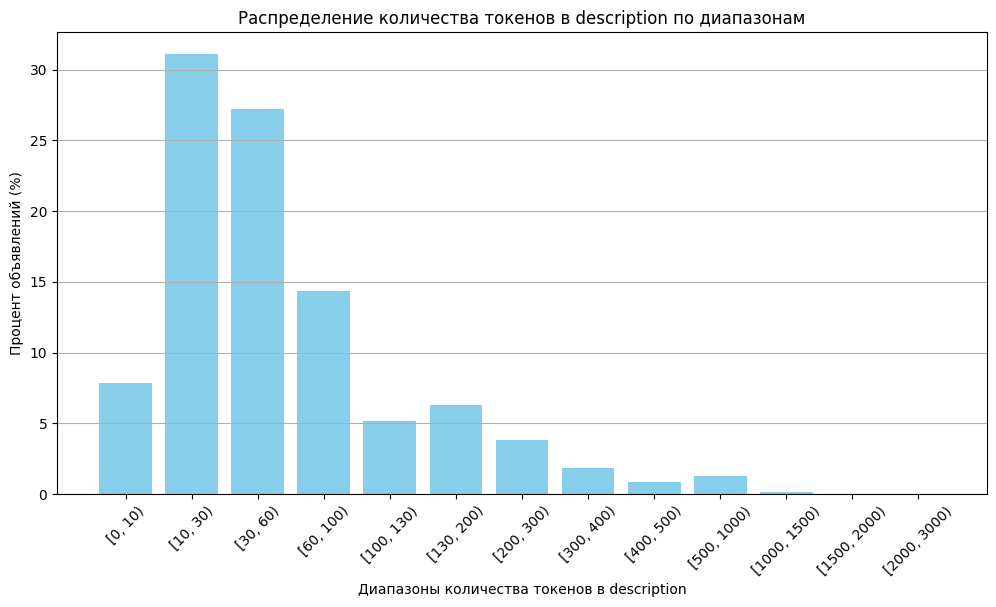

In [6]:
from matplotlib import pyplot as plt

bins = [0, 10, 30, 60, 100, 130, 200, 300, 400, 500, 1000, 1500, 2000, 3000]

data['token_bins'] = pd.cut(data['description_tokens'], bins=bins, right=False)

token_distribution = data['token_bins'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(12, 6))
plt.bar(token_distribution.index.astype(str), token_distribution.values, color='skyblue')
plt.xlabel("Диапазоны количества токенов в description")
plt.ylabel("Процент объявлений (%)")
plt.title("Распределение количества токенов в description по диапазонам")
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.show()

In [7]:
data[(data['description_tokens'] > 200) & (data['description_tokens'] < 500)]['description_tokens'].sum(axis=0)

25668683

In [8]:
def lexical_diversity(text):
    if pd.isnull(text):
        return 0
    words = text.split()
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

# подсчет лексического разнообразия в выборке
data['lexical_diversity'] = data['description'].apply(lexical_diversity)

In [9]:
# отсев коротких по описанию объявлений, а также объявлений с низким лексическим разнообразием 
# данные с лексическим разнообразием ниже 0.6, а особенно 0.5, часто содержат очень много повторяющихся слов, имеют неинформативную структуру
# лучше не включать такие данные в выборку для finetune модели
print("число токенов по описаниям в получившемся наборе данных: ", \
      data[(data['lexical_diversity'] > 0.6) & (data['description_tokens'] > 250)]['description_tokens'].sum())
data = data[(data['lexical_diversity'] > 0.6) & (data['description_tokens'] > 250)]

число токенов по описаниям в получившемся наборе данных:  31313187


Датасет все еще содержит больше токенов, чем нужно. Попробуем отобрать данные при помощи предобученной на русскоязычных датасетах LLM.
Будем выбирать данные, имеющие наибольшее правдоподобие (log_likelihood)

In [6]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

model_name = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss 
        perplexity = torch.exp(loss) 

    return perplexity.item()

def calculate_log_likelihood(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
        log_likelihood = -outputs.loss * inputs["input_ids"].size(1)
    return log_likelihood.item()

In [14]:
# little_data = data[:1000]
data['loglikelihood'] = data['description'].apply(calculate_log_likelihood)

In [ ]:
# data.to_csv("train_loglikelihood.csv", index=False, encoding='utf-8')

In [73]:
print((data['loglikelihood'] < -1500).value_counts())

row = data[(data['loglikelihood'] < -1500)].sample(1).iloc[0]


print(row.get("description"))

loglikelihood
False    83807
True      3813
Name: count, dtype: int64
Тур во Вьетнам (Фантьет) на 11 ночей/
Вылет 13.04.2017 из Москвы/
Отель Bavico Boutique Resort Muine 3*/
В стоимость тура включен:/
прямой перелет в обе стороны, питание (ЗАВТРАК), трансфер, проживание, медицинская страховка/
 /
* Цена указана за одного человека при двухместном размещении./
 /
=====================================/
 /
Продажа через турагенство Vista *****Туры от бюджетного до элитного уровня.Все включено + качественное обслуживание, вежливые менеджеры + хорошее настроение./
*******************************************************************************/
Гарантия адекватных цен обеспечивает работа напрямую с надежными операторами Anex..Tez Tour..Sunmar..Pegas..Coral Travel.Вы получите максимальную скидку от цены на сайте оператора/
Оформление тура возможно удаленно, посетить офис нужно только один раз, когда оплачивать подтвержденный тур. Подберем тур под ваши пожелания, большой ассортимент предложени

Предполагалось, что использование log-likelihood, вычисляемого при помощи предобученной LLM, поможет оценить качество и правдоподобие текстов объявлений. Идея заключалась в том, что тексты с высокой логарифмической вероятностью будут восприниматься моделью как «естественные» и лучше соответствовать стандартам языка, а значит, будут более репрезентативны для обучения.

Однако, при применении этого подхода к описаниям товаров выяснилось, что log-likelihood не подходит для адекватной оценки их качества. Модель придает высокие значения логарифмической вероятности текстам, написанным в форме связного повествования или последовательного изложения, без разделения на пункты и перечислений. В то же время объявления, содержащие структурированное описание характеристик товара (например, «размер: 40 см, цвет: синий»), оцениваются как менее правдоподобные. Это связано с тем, что такие тексты, хотя и содержат полезную информацию, сильно отличаются по структуре от обычных повествовательных текстов, на которых обучена модель.   

Кроме того, существенно изменилось распределение объявлений по виду и стилю написания: вместо разнообразного набора текстов отобрались только объявления, написанные в форме связного текста, без дополнительных подзаголовков. Это создало перекос в данных и может привести к тому, что дообученная модель будет хуже справляться с текстами, представленными в виде списка характеристик или имеющими другое представление.

In [18]:
#можно посмотреть на случайные длинные объявления
row = data[data['description_tokens'] > 1000].sample(1).iloc[0]
# row = data[(data['lexical_diversity'] > 0.6) & (data['lexical_diversity'] < 0.97) & (data['description_tokens'] > 1000)].sample(1).iloc[0]
# row = data[data['tfidf_score'] > 13e-5].sample(1).iloc[0]
print(f"Длина description: {row['description_tokens']}")
print(f"Lexical diversity: {row['lexical_diversity']}")
# print(f"TF-IDF score: {row['tfidf_score']}")
print(row['description'])
print('*'*50)

Длина description: 1001
Lexical diversity: 0.6883852691218131
Эллиптический тренажер APPLEGATE E22 M
 
APPLEGATE E22 M с магнитной системой нагружения относится к классу среднегабаритных эллиптических тренажеров для домашнего применения. Его отличает устойчивая рамная конструкция из усиленного профиля, выдерживающая вес пользователя до 130 кг. Система нагружения построена на базе классического заднего привода. Магнитная система нагружения по технологии bio-Flow™ обеспечивает биомеханически правильное педалирование и корректное распределение нагрузки по всей траектории движения. За высокое качество кручения отвечает трехкомпонентный педальный узел и мощный сбалансированный маховик с инерционным весом 22 кг. Длина шага составляет 42 см. Расстояние между педалями (так называемый "малый Q-Фактор S.Q.F.™") составляет всего 18 см - это одно из самых минимальных значений для эллипсоидов с задним приводом. Чем меньше такое значение, тем больше тренировка на тренажере приближена к естественным 

In [19]:
data['description_tokens'].sum()

31313187

Теперь, когда "плохие" объявления из выборки для обучения отсеяны, все еще суммарно имеется 40М токенов. Это значительно больше нужного.  
Отберем из каждой категории товара 160 случайных объявлений.

In [20]:
categories = data['category_name'].unique()
size_dict = data.groupby('category_name').size().to_dict()
size_dict

{'Автомобили': 5035,
 'Аудио и видео': 2209,
 'Билеты и путешествия': 913,
 'Бытовая техника': 2673,
 'Велосипеды': 1474,
 'Водный транспорт': 210,
 'Гаражи и машиноместа': 42,
 'Готовый бизнес': 741,
 'Грузовики и спецтехника': 613,
 'Детская одежда и обувь': 1490,
 'Дома, дачи, коттеджи': 2989,
 'Другие животные': 75,
 'Земельные участки': 627,
 'Игры, приставки и программы': 552,
 'Квартиры': 10059,
 'Книги и журналы': 626,
 'Коллекционирование': 663,
 'Коммерческая недвижимость': 703,
 'Комнаты': 165,
 'Кошки': 185,
 'Красота и здоровье': 1974,
 'Мебель и интерьер': 3543,
 'Мотоциклы и мототехника': 334,
 'Музыкальные инструменты': 605,
 'Недвижимость за рубежом': 32,
 'Оборудование для бизнеса': 2069,
 'Одежда, обувь, аксессуары': 2574,
 'Оргтехника и расходники': 450,
 'Планшеты и электронные книги': 837,
 'Посуда и товары для кухни': 322,
 'Предложение услуг': 3896,
 'Ремонт и строительство': 5534,
 'Собаки': 252,
 'Спорт и отдых': 2284,
 'Телефоны': 3783,
 'Товары для детей и и

In [79]:
categories = data['category_name'].unique()
size_dict = data.groupby('category_name').size().to_dict()

new_df = pd.DataFrame()
for cat in categories:
    df= data[data['category_name'] == cat].sample(160 if size_dict[cat] >= 100 else size_dict[cat])
    new_df = pd.concat([new_df, df])

In [80]:
new_df['description_tokens'].sum()

2607588

In [23]:
token_categories = {}
for cat in categories:
    token_categories[cat] = new_df[new_df['category_name'] == cat]['description_tokens'].sum()

In [24]:
token_categories

{'Товары для компьютера': 77808,
 'Комнаты': 52813,
 'Предложение услуг': 64931,
 'Товары для детей и игрушки': 71067,
 'Дома, дачи, коттеджи': 63452,
 'Планшеты и электронные книги': 73399,
 'Бытовая техника': 65514,
 'Аудио и видео': 75804,
 'Автомобили': 70740,
 'Квартиры': 65022,
 'Часы и украшения': 71815,
 'Спорт и отдых': 75063,
 'Мебель и интерьер': 61772,
 'Оборудование для бизнеса': 68148,
 'Красота и здоровье': 75127,
 'Мотоциклы и мототехника': 70159,
 'Ремонт и строительство': 66915,
 'Телефоны': 68783,
 'Грузовики и спецтехника': 79345,
 'Игры, приставки и программы': 76716,
 'Детская одежда и обувь': 52536,
 'Посуда и товары для кухни': 74400,
 'Велосипеды': 70652,
 'Земельные участки': 63494,
 'Музыкальные инструменты': 73478,
 'Готовый бизнес': 85733,
 'Одежда, обувь, аксессуары': 60582,
 'Водный транспорт': 73712,
 'Книги и журналы': 73534,
 'Оргтехника и расходники': 81611,
 'Коммерческая недвижимость': 63330,
 'Билеты и путешествия': 88103,
 'Коллекционирование': 72

Распределение токенов по категориям можно считать сбалансированным, за исключением редких категорий, которых в датасете меньше 100.

Хотим иметь следующую нотацию данных для fine-tune модели. То есть, сохраняем \n внутри описаний объявления, и разделяем различные поля контекста при помощи специального токена.     
Пояснение, почему оставляем \n внутри описания: если посмотреть на различные объявления, можно заметить, что довольно часто в длинных объявлениях символ переноса строки разделяет разные пункты и категории в описании товара. Удаление этого символа может привести к потере или искажению структуры/смысловой части, приведенной в описании объявления.   

In [432]:
# [CATEGORY]: "Автомобили" [SEP]
# [TITLE]: Продаю автомобиль Шевроле Лачетти [SEP]
# [DESCRIPTION]: Автомобиль в хорошем состоянии. Куплен в 2008 году. Пробег 120 000 км. \n Технически исправен. \n Недавно заменены все расходники, состояние кузова без нареканий.[SEP]
# [ATTRIBUTES]: Тип кузова: Седан \n Трансмиссия: Автомат \n Цвет: Черный \n Пробег: 120 000 км \n Дополнительные опции: Обогрев сидений, кондиционер, подогрев зеркал.[SEP]
# [QUESTION]: Какое состояние автомобиля? [SEP]
# [ANSWER]: Автомобиль в хорошем техническом состоянии, недавно заменены все расходники. [SEP]

In [95]:
# хотим получить обучающую выборку в json, в соответствии со следующим форматом:
[
  {
    "category": "Автомобили",
    "title": "Продается автомобиль Toyota Land Cruiser",
    "description": "Автомобиль в отличном состоянии, полный комплект. Год выпуска — 2018. Пробег — 50 000 км.",
    "attributes": "Цвет: черный, Привод: полный, Коробка: автомат",
    "price": 1500000,
    "generated_questions": [
      {
        "question": "Какой пробег у автомобиля?",
        "answer": "Пробег автомобиля составляет 50 000 км."
      },
      {
        "question": "В каком состоянии автомобиль?",
        "answer": "Автомобиль в отличном состоянии."
      }
    ]
  },
  ...
]

[{'category': 'Автомобили',
  'title': 'Продается автомобиль Toyota Land Cruiser',
  'description': 'Автомобиль в отличном состоянии, полный комплект. Год выпуска — 2018. Пробег — 50 000 км.',
  'attributes': 'Цвет: черный, Привод: полный, Коробка: автомат',
  'price': 1500000,
  'generated_questions': [{'question': 'Какой пробег у автомобиля?',
    'answer': 'Пробег автомобиля составляет 50 000 км.'},
   {'question': 'В каком состоянии автомобиль?',
    'answer': 'Автомобиль в отличном состоянии.'}]},
 Ellipsis]

In [81]:
def create_attributes(row):
    attributes = [row.get('param_1', ''), row.get('param_2', ''), row.get('param_3', '')]
    return ", ".join(filter(lambda x: pd.notnull(x) and x != '', attributes))

new_df['attributes'] = new_df.apply(create_attributes, axis=1)
final_df = new_df[['category_name', 'title', 'description', 'attributes', 'price']]
json_data = final_df.to_dict(orient='records')


In [82]:
import json
with open('train_processed.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, indent=4, ensure_ascii=False)

In [26]:
final_df

,category_name,title,description,attributes,price
995957,Товары для компьютера,Матрица 15.6 бу,"ltn156at30 15,6"" Совместимость матриц LED 1366...",Мониторы,NaN
808443,Товары для компьютера,Монитор,Характеристики\nОбщие характеристики\nТип\nЖК-...,Мониторы,5000.0
347697,Товары для компьютера,Intel Xeon E5430 - на LGA775,Intel Xeon E5430 2.66 GHz 4core 12Mb L2 80W 13...,"Комплектующие, Процессоры",1000.0
33458,Товары для компьютера,Продаю связку с Intel Core i7-6700 Skylake,Продаю связку для сборки системного блока игро...,"Комплектующие, Процессоры",39000.0
1308711,Товары для компьютера,Видеокарта nvidia GeForce GTX 960 (4 GB),Точное название видеокарты - GIGABYTE GeForce ...,"Комплектующие, Видеокарты",15000.0
...,...,...,...,...,...
547482,Недвижимость за рубежом,Квартира (Испания),Без посредников сдаю 1 паре посуточно комнату ...,"Сдам, Квартира, апартаменты, Посуточно",2400.0
438038,Недвижимость за рубежом,Дом (Украина),"Продаю капитальный трёхэтажный дом, с подсобны...","Продам, Дом, вилла, Украина",4300000.0
42114,Недвижимость за рубежом,Квартира (Таиланд),Продается квартира в Condominium Nam Nalay в Ю...,"Продам, Квартира, апартаменты, Таиланд",1850000.0
391349,Недвижимость за рубежом,Дом (Германия),Вилла класса Люкс в Берлине – Целендорф. Цена ...,"Продам, Дом, вилла, Германия",370000000.0


In [70]:
row = final_df.sample(1)
print(row.index)
print(row.iloc[0].get("description"))

Index([1209916], dtype='int64')
Только у нас
 
→ Большой выбор различных принтеров, мфу
 
→ Самые низкие цены в городе ✔
 
→ Предостовляем гарантию на данный товар ✔
 
 
 
 ♛Принимаем оплату банковскими картами visa, Master Card !
 
 ♛Отправляем в регионы !
 
Общие характеристики
Устройство: принтер
Тип печати: черно-белая
Технология печати: лазерная
Размещение: настольный
Область применения: средний офис
Количество страниц в месяц: 650
Принтер
Максимальный формат: A3
Максимальное разрешение для чб печати: 1200x1200 dpi
Скорость печати: 35 стрмин (чб А4)
Время выхода первого отпечатка: 10 c (чб)
Лотки
Подача бумаги: 850 лист. (стандартная)
Вывод бумаги: 250 лист. (стандартный)
Расходные материалы
Плотность бумаги: 60-199 гм2
Печать на: пленках, этикетках, фотобумаге, глянцевой бумаге, конвертах, матовой бумаге
Тип картриджатонера: Q7516A
ПамятьПроцессор
Объем памяти: 64 Мб, максимальный 512 Мб 
Процессор: MIPS
Частота процессора: 240 МГц
Интерфейсы
Ethernet (RJ-45), LPT, USB 2.0
 
КООР

In [ ]:
import json
import tiktoken
import numpy as np

tokenizer = tiktoken.encoding_for_model('gpt-4')
def calculate_tokens(entry):
    text = (f"Category: {entry['category_name']}\n"
            f"Title: {entry['title']}\n"
            f"Description: {entry['description']}\n"
            f"Attributes: {entry['attributes']}\n"
            f"Price: {entry['price']}")
    tokens = tokenizer.encode(text)
    return len(tokens)


def calculate_percentiles(data):
    token_counts = [calculate_tokens(entry) for entry in data]
    sorted_token_counts = np.sort(token_counts)
    return token_counts, sorted_token_counts


with open('processed_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

token_counts, sorted_token_counts = calculate_percentiles(data)
total_entries = len(data)


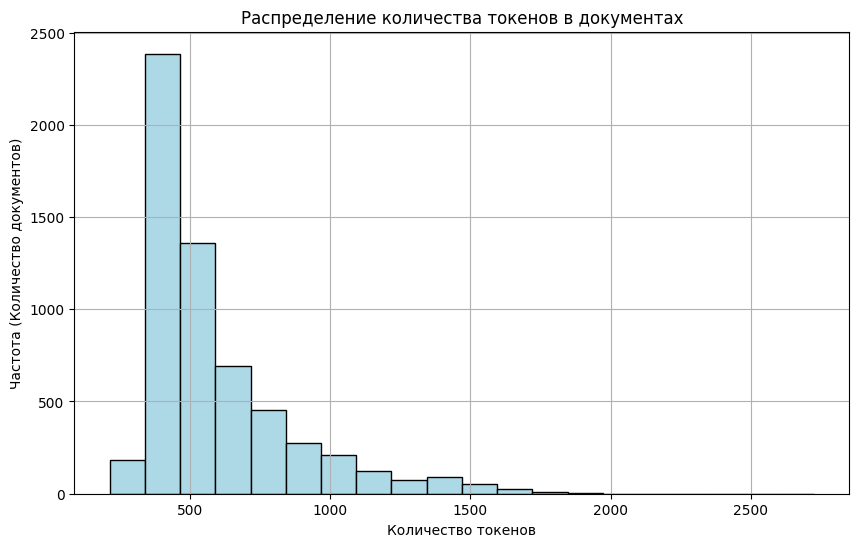

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=20, edgecolor='black', color='lightblue')
plt.title('Распределение количества токенов в документах')
plt.xlabel('Количество токенов')
plt.ylabel('Частота (Количество документов)')
plt.grid(True)

plt.show()
